# Weather API
----

### Description  
*  Latitute and Longitute coordinates will be generated from random number generation 
*  Make citipy API calls based on the (lat, lng), and find at least 500 unique cities
*  For each city in the list, make OpenWeatherMap API call and obtain the current weather information 
       * organize result in DataFrame
       * store result in csv.
* Plot results based on the lattitude 
       * Temperature (F)
       * Humidity (%)
       * Cloudiness (%)
       * Wind Speed (mph)
       
### Data
* (Lat, Lng) corrdintates: from random number generation 
* City names: citipy API
* City weather: OpenWeatherMap API

### Conclusion: 
1. (`max Temperature (F)` vs. lattitude): In general, max temperature is `higher near the Equater` (as expeted). However,  
    * the temperature curve shifted right, meaning the `temperature is `**`higher`**` in the Northern Hemisphere`. 
    * the `temperature difference` between the `Northern` and `Southern Hemisphere` **`increases`** as the absolute lattitude increases  
    
    
2. (`Humidity (%)` vs. Lattitude): Overall, the humidity is relatively high globally:  
    * With an average ~ 60%
    * Within the ~500 cities found, only ~20 cities have humidity less than 20%
    
      
3. `Cloudiness` is distributed relativly evenly, with many cities either having 0% (sunny) or 100% cloudiness

  
4. (`Wind Speed (mph)` vs. Lattitude): Overall, the wind speed is not very high globally: 
    * With an average ~ 10mph
    * Max wind speed ~ 30mph
    * Within the ~500 cities found, ~10 cities have wind speed > 25mph
    

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#from api_keys import api_key
api_key = 'e350ecd0f8457e05a2d7e54f90968b59'
import openweathermapy

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# pprint
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1500)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print("There are {} cities found from random geo-coordinates.".format(len(cities)))

There are 638 cities found from random geo-coordinates.


### OpenWeatherMap API Calls

* Loop though each city on the cities list 
* Perform a (current) weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
    * Note: including `end = '\r'` can override the previous line, which can make the output much cleaner

In [3]:
# convert the time returned(in seconds) to meaningful time expression
def convert_time(sec):
    order = [ -2, 1, 2, -1, 0]
    local_time = time.ctime(sec).split(" ")
    order_time = [local_time[i] for i in order]
    return f"{order_time[0]} {order_time[1]}/{order_time[2]}/{order_time[3]} ({order_time[4]})"

In [4]:
# Compose url 
unit = "Imperial"
base_url = f"http://api.openweathermap.org/data/2.5/weather?"
param = {"appid" : api_key,
         "units" : unit}

# Initiate DataFrame
city_weather_now_df = pd.DataFrame(columns=["City",
                                            "Country",
                                            "Lat",
                                            "Lng",
                                            "Max Temp (F)",
                                            "Cloudiness (%)",
                                            "Humidity (%)",
                                            "Wind Speed (mph)",
                                            "Data Retrieved Time"])

# Begin printing the information 
print("Beginning Data Retrieval")
print("----------------------------------------------------------------------------------")

# Loop through the cities, find the cities that OpenWeatherMap can find 
# and store the information to the DataFrame
i = 0
not_found = 0
for city in cities:
    param["q"] = city
    data = requests.get(base_url, params=param).json()
    
    try:
        city_weather_now_df.loc[i, "City"] = data["name"]
        city_weather_now_df.loc[i, "Country"] = data["sys"]["country"]
        city_weather_now_df.loc[i, "Lat"] = data["coord"]["lat"]
        city_weather_now_df.loc[i, "Lng"] = data["coord"]["lon"]
        city_weather_now_df.loc[i, "Max Temp (F)"] = data["main"]["temp_max"]
        city_weather_now_df.loc[i, "Cloudiness (%)"] = data["clouds"]["all"]
        city_weather_now_df.loc[i, "Humidity (%)"] = data["main"]["humidity"]
        city_weather_now_df.loc[i, "Wind Speed (mph)"] = data["wind"]["speed"]
        city_weather_now_df.loc[i, "Data Retrieved Time"] = convert_time(data['dt'])
        i += 1
        print("Processing Record {:3d}/{} | {:20s}\t(# cities not found: {:3d})        ".format(i,
                                                                                         len(cities),
                                                                                         data['name'],
                                                                                         not_found))
              #, end='\r')
              # uncomment this line for clean output
    except KeyError:
        print("City not found. Skipping...{:28s}\t(# cities not found: {:3d})          ".format(" ",
                                                                                                not_found + 1))
              # ,end='\r')
              # uncomment this line for clean output
        not_found += 1

print("\n")
print(f"""
----------------------------------------------------------------------------------
Data Retrieval Complete  
{len(city_weather_now_df)} cities' weather data collected
----------------------------------------------------------------------------------""")

Beginning Data Retrieval
----------------------------------------------------------------------------------
Processing Record   1/638 | Christchurch        	(# cities not found:   0)        
Processing Record   2/638 | Cape Town           	(# cities not found:   0)        
Processing Record   3/638 | Ponta Delgada       	(# cities not found:   0)        
Processing Record   4/638 | Olinda              	(# cities not found:   0)        
Processing Record   5/638 | Faanui              	(# cities not found:   0)        
Processing Record   6/638 | Avarua              	(# cities not found:   0)        
Processing Record   7/638 | Nautla              	(# cities not found:   0)        
Processing Record   8/638 | East London         	(# cities not found:   0)        
Processing Record   9/638 | Mudon               	(# cities not found:   0)        
Processing Record  10/638 | Butaritari          	(# cities not found:   0)        
Processing Record  11/638 | Upernavik           	(# cities not

Processing Record  91/638 | Samarkand           	(# cities not found:   8)        
Processing Record  92/638 | Yar-Sale            	(# cities not found:   8)        
Processing Record  93/638 | Barrow              	(# cities not found:   8)        
Processing Record  94/638 | Moyale              	(# cities not found:   8)        
Processing Record  95/638 | Saldanha            	(# cities not found:   8)        
Processing Record  96/638 | Aitape              	(# cities not found:   8)        
Processing Record  97/638 | Yulara              	(# cities not found:   8)        
Processing Record  98/638 | Shelburne           	(# cities not found:   8)        
Processing Record  99/638 | Port Elizabeth      	(# cities not found:   8)        
Processing Record 100/638 | Thayetmyo           	(# cities not found:   8)        
Processing Record 101/638 | Dong Hoi            	(# cities not found:   8)        
Processing Record 102/638 | Nurota              	(# cities not found:   8)        
Proc

City not found. Skipping...                            	(# cities not found:  17)          
Processing Record 184/638 | Porto Novo          	(# cities not found:  17)        
Processing Record 185/638 | Botou               	(# cities not found:  17)        
Processing Record 186/638 | Airai               	(# cities not found:  17)        
Processing Record 187/638 | Oudtshoorn          	(# cities not found:  17)        
City not found. Skipping...                            	(# cities not found:  18)          
Processing Record 188/638 | Constitucion        	(# cities not found:  18)        
Processing Record 189/638 | Belmonte            	(# cities not found:  18)        
Processing Record 190/638 | Puyang              	(# cities not found:  18)        
Processing Record 191/638 | Bethel              	(# cities not found:  18)        
Processing Record 192/638 | Souillac            	(# cities not found:  18)        
Processing Record 193/638 | Haines Junction     	(# cities not found:

City not found. Skipping...                            	(# cities not found:  29)          
Processing Record 271/638 | Acapulco            	(# cities not found:  29)        
City not found. Skipping...                            	(# cities not found:  30)          
City not found. Skipping...                            	(# cities not found:  31)          
Processing Record 272/638 | Marovoay            	(# cities not found:  31)        
Processing Record 273/638 | Wenling             	(# cities not found:  31)        
Processing Record 274/638 | Alvorada            	(# cities not found:  31)        
Processing Record 275/638 | Mehamn              	(# cities not found:  31)        
City not found. Skipping...                            	(# cities not found:  32)          
Processing Record 276/638 | Necochea            	(# cities not found:  32)        
Processing Record 277/638 | Bilibino            	(# cities not found:  32)        
Processing Record 278/638 | Diego de Almagro    	(#

Processing Record 358/638 | Williams Lake       	(# cities not found:  41)        
Processing Record 359/638 | Port Lincoln        	(# cities not found:  41)        
City not found. Skipping...                            	(# cities not found:  42)          
Processing Record 360/638 | Warri               	(# cities not found:  42)        
Processing Record 361/638 | Karasjok            	(# cities not found:  42)        
Processing Record 362/638 | Fort Nelson         	(# cities not found:  42)        
Processing Record 363/638 | Bundaberg           	(# cities not found:  42)        
Processing Record 364/638 | Bubaque             	(# cities not found:  42)        
Processing Record 365/638 | Alvaraes            	(# cities not found:  42)        
Processing Record 366/638 | Soyo                	(# cities not found:  42)        
Processing Record 367/638 | Seoul               	(# cities not found:  42)        
Processing Record 368/638 | Vostok              	(# cities not found:  42)    

Processing Record 448/638 | Kachiry             	(# cities not found:  49)        
Processing Record 449/638 | Yumen               	(# cities not found:  49)        
Processing Record 450/638 | Iralaya             	(# cities not found:  49)        
Processing Record 451/638 | Aleppo              	(# cities not found:  49)        
Processing Record 452/638 | Talnakh             	(# cities not found:  49)        
Processing Record 453/638 | Melenci             	(# cities not found:  49)        
Processing Record 454/638 | Farim               	(# cities not found:  49)        
Processing Record 455/638 | Dwarka              	(# cities not found:  49)        
City not found. Skipping...                            	(# cities not found:  50)          
Processing Record 456/638 | Sakaiminato         	(# cities not found:  50)        
Processing Record 457/638 | Husavik             	(# cities not found:  50)        
Processing Record 458/638 | Castro              	(# cities not found:  50)    

Processing Record 538/638 | Kindersley          	(# cities not found:  63)        
Processing Record 539/638 | Nouadhibou          	(# cities not found:  63)        
Processing Record 540/638 | Pucallpa            	(# cities not found:  63)        
Processing Record 541/638 | New Richmond        	(# cities not found:  63)        
Processing Record 542/638 | Camacha             	(# cities not found:  63)        
Processing Record 543/638 | Gambela             	(# cities not found:  63)        
Processing Record 544/638 | Carutapera          	(# cities not found:  63)        
Processing Record 545/638 | Chegem              	(# cities not found:  63)        
Processing Record 546/638 | Erenhot             	(# cities not found:  63)        
Processing Record 547/638 | Nanortalik          	(# cities not found:  63)        
Processing Record 548/638 | Petropavlovsk-Kamchatskiy	(# cities not found:  63)        
Processing Record 549/638 | Yaransk             	(# cities not found:  63)        

### Save data stored in DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather_now_df.count()

City                   571
Country                571
Lat                    571
Lng                    571
Max Temp (F)           571
Cloudiness (%)         571
Humidity (%)           571
Wind Speed (mph)       571
Data Retrieved Time    571
dtype: int64

In [6]:
city_weather_now_df.head()

,City,Country,Lat,Lng,Max Temp (F),Cloudiness (%),Humidity (%),Wind Speed (mph),Data Retrieved Time
0,Christchurch,NZ,-43.53,172.64,34,0,92,1.12,12:37:47 Jun/27/2019 (Thu)
1,Cape Town,ZA,-33.93,18.42,59,75,71,24.16,12:31:29 Jun/27/2019 (Thu)
2,Ponta Delgada,PT,37.73,-25.67,66.2,20,63,14.99,12:30:08 Jun/27/2019 (Thu)
3,Olinda,AU,-37.84,145.39,57,47,71,10.29,12:34:41 Jun/27/2019 (Thu)
4,Faanui,PF,-16.48,-151.75,78.61,28,76,4.65,12:34:28 Jun/27/2019 (Thu)


In [7]:
city_weather_now_df.to_csv(output_data_file)

### Plotting the Data
* Plot `Max Temperature`, `Humidity`, `Cloudiness`, and `Wind Speed` across all `Latitude`.
* Save the plotted figures as .pngs.

In [8]:
font = 15
date = city_weather_now_df['Data Retrieved Time'][0].split(' ')[1] 

# define a functino that deals with the plotting style
def plot_setting(x, y, color, alpha):
    plt.figure(figsize=(8,5))
    plt.scatter(x, y, facecolor = color, edgecolor = 'k', alpha = alpha)
    xrange = max(x) - min(x)
    yrange = max(y) - min(y)
    plt.xlim(min(x) - xrange/5, max(x) + xrange/5)
    plt.ylim(min(y) - yrange/5, max(y) + yrange/5)
    plt.grid(True)

#### Latitude vs. Temperature Plot

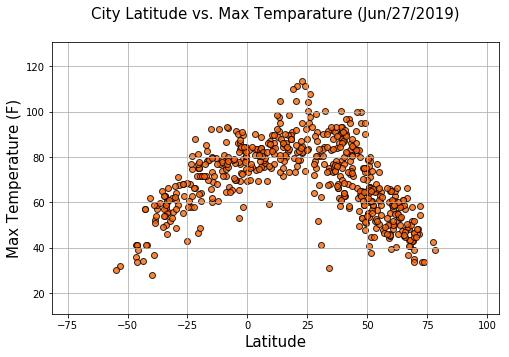

In [9]:
# define x, y axis
col = ["Lat", "Max Temp (F)"]

x = city_weather_now_df[col[0]]
y = city_weather_now_df[col[1]]

# plot Latitude vs. Max Temperature
color = (1, 0.4, 0)
alpha = 0.8
plot_setting(x,y, color, alpha)
plt.xlabel("Latitude", fontsize = font)
plt.ylabel("Max Temperature (F)", fontsize = font)
plt.title(f"City Latitude vs. Max Temparature ({date})\n", fontsize = font)
# plt.savefig("output_data/max_temp.png")
plt.show()

In [10]:
# Create a temp_df DataFrame for more indepth temperature analysis
cols = ["City", "Country", "Lat", "Max Temp (F)"]
temp_df = city_weather_now_df[cols].copy()
temp_df["Lat"] = temp_df["Lat"].astype("float")
temp_df["Max Temp (F)"] = temp_df["Max Temp (F)"].astype("float")

# ------------- binning------------- 
# bins
bin_width = 5
lat_min = round(temp_df["Lat"].min()) + bin_width
lat_max = round(temp_df["Lat"].max())

# to ensure the bins are symmetric around Equater
if abs(lat_min) > lat_max:
    lat_0 = lat_max
else: 
    lat_0 = -lat_min

bins_pos = list(np.arange(0, lat_0 + 1, bin_width)) 
bins_neg = [-x for x in bins_pos if x != 0]
bins_neg.sort()
bins = ([lat_range[0]] + bins_neg + bins_pos + [lat_range[1]])
print(f"neg_bins:{bins[:len(bins)//2]}\npos_bins:{bins[len(bins)//2 :]}")

# bins label
label_name = [f"({str(bins[i])}, {str(bins[i+1])}]" for i in range(len(bins) -1)]
label_name[0] = f"<= {bins[1]}"
label_name[-1] = f"> {bins[-2]}"

# create new col for binned results
temp_df["Lat_group"] = pd.cut(temp_df["Lat"], bins, labels=label_name)
temp_df.head()

neg_bins:[-90, -50.0, -45.0, -40.0, -35.0, -30.0, -25.0, -20.0, -15.0, -10.0, -5.0]
pos_bins:[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 90]


,City,Country,Lat,Max Temp (F),Lat_group
0,Christchurch,NZ,-43.53,34.00,"(-45.0, -40.0]"
1,Cape Town,ZA,-33.93,59.00,"(-35.0, -30.0]"
2,Ponta Delgada,PT,37.73,66.20,"(35.0, 40.0]"
3,Olinda,AU,-37.84,57.00,"(-40.0, -35.0]"
4,Faanui,PF,-16.48,78.61,"(-20.0, -15.0]"


In [11]:
# ------------- groupby, and calculate averege temp ------------- 
lat_temp_df = temp_df.groupby(["Lat_group"]).mean()["Max Temp (F)"]
avg_lat = ([(lat_min + bins[1])/2] + 
           [(bins[i] + bins[i+1])/2 for i in range(1, len(bins)-2)] + 
           [(lat_max + bins[-2])/2])
lat_temp_df = lat_temp_df.reset_index()
lat_temp_df["avg_lat"] = pd.Series(avg_lat)
lat_temp_df.head()

,Lat_group,Max Temp (F),avg_lat
0,<= -50.0,31.100000,-50.0
1,"(-50.0, -45.0]",38.658333,-47.5
2,"(-45.0, -40.0]",48.645000,-42.5
3,"(-40.0, -35.0]",51.860909,-37.5
4,"(-35.0, -30.0]",58.067826,-32.5


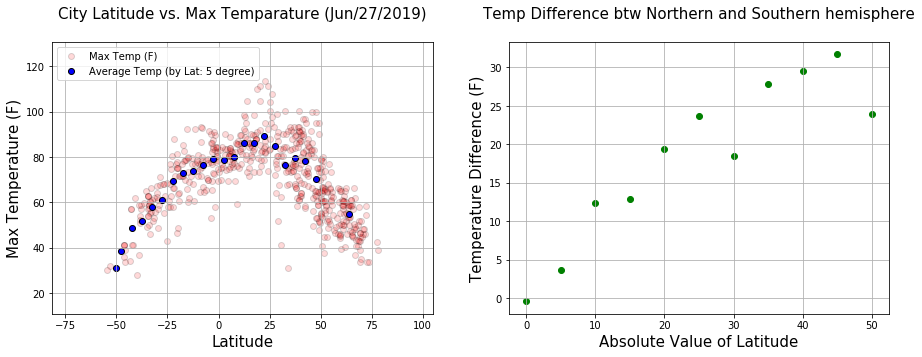

In [12]:
# Plot Tempareture Difference in Northern and Southern Hemisphere
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

# Plot temperature of all cities
ax1
# define x, y axis
col = ["Lat", "Max Temp (F)"]

x = city_weather_now_df[col[0]]
y = city_weather_now_df[col[1]]
color = 'red'
alpha = 0.15
ax1.scatter(x, y,facecolor = color, edgecolor = 'k', alpha = 0.15)
xrange = max(x) - min(x)
yrange = max(y) - min(y)
ax1.set_xlim(min(x) - xrange/5, max(x) + xrange/5)
ax1.set_ylim(min(y) - yrange/5, max(y) + yrange/5)

# plot average Temperature, every 5 degree lat
col = ["avg_lat", "Max Temp (F)"]
x = lat_temp_df[col[0]]
y = lat_temp_df[col[1]]
ax1.scatter(x, y, facecolor = 'blue', edgecolor = 'k', alpha = 1, 
            label = f"Average Temp (by Lat: {bin_width} degree)")

ax1.grid(True)
ax1.set_xlabel("Latitude", fontsize = font)
ax1.set_ylabel("Max Temperature (F)", fontsize = font)
ax1.legend(loc = "upper left")
ax1.set_title(f"City Latitude vs. Max Temparature ({date})\n", fontsize = font)


# Plot temperature difference between NORTHERN and SOUTHERN hemispheres
rows = lat_temp_df.count()["avg_lat"]
diff = []
for i in range(rows//2):
    df = (lat_temp_df.iloc[-i-1, 1] - lat_temp_df.iloc[i, 1])
    diff.append(df)
    
ax2.scatter(bins_pos, diff[::-1], facecolor = 'green', label = "Temp diff")
ax2.grid(True)
ax2.set_xlabel("Absolute Value of Latitude", fontsize = font)
ax2.set_ylabel("Temperature Difference (F)", fontsize = font)
ax2.set_title(f"Temp Difference btw Northern and Southern hemisphere\n", fontsize = font)

plt.tight_layout
plt.savefig("output_data/max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

Average Humidity: 65.91 %
Max Humidity: 100.00 %
Number of city with less than 20% humidity: 18



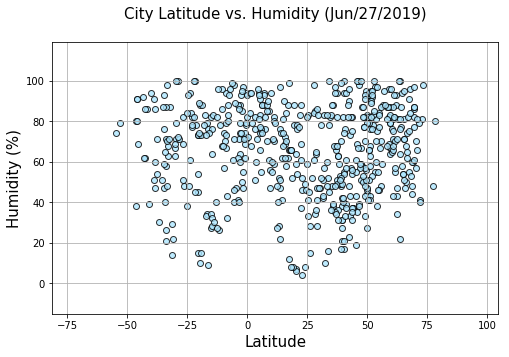

In [13]:
# define x, y axis
print("Average Humidity: {:.2f} %".format(city_weather_now_df['Humidity (%)'].mean()))
print("Max Humidity: {:.2f} %".format(city_weather_now_df['Humidity (%)'].max()))
print("Number of city with less than 20% humidity: {}\n".format(city_weather_now_df[city_weather_now_df
                                                                                    ['Humidity (%)'] 
                                                                          < 20].count()['City']))

col = ["Lat", "Humidity (%)"]

x = city_weather_now_df[col[0]]
y = city_weather_now_df[col[1]]

# plot Latitude vs. Humidity
color = (0.68, 0.9, 1)
alpha = 0.8
plot_setting(x,y,color,alpha)
plt.xlabel("Latitude", fontsize = font)
plt.ylabel(col[1], fontsize = font)
plt.title(f"City Latitude vs. Humidity ({date})\n", fontsize = font)
plt.savefig("output_data/humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

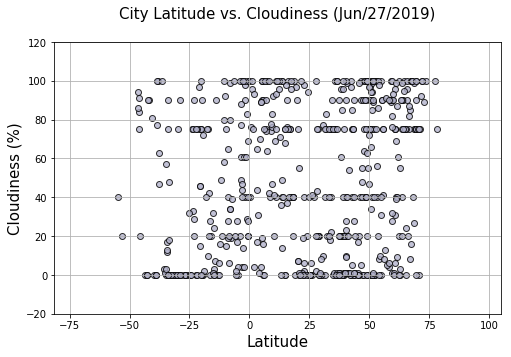

In [14]:
# define x, y axis
col = ["Lat", "Cloudiness (%)"]

x = city_weather_now_df[col[0]]
y = city_weather_now_df[col[1]]

# plot Latitude vs. Cloudiness
color = (0.7, 0.7, 0.8)
alpha = 0.8
plot_setting(x,y,color,alpha)
plt.xlabel("Latitude", fontsize = font)
plt.ylabel(col[1], fontsize = font)
plt.title(f"City Latitude vs. Cloudiness ({date})\n", fontsize = font)
plt.savefig("output_data/cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

Average Wind Speed: 9.00
Max Wind Speed: 35.57
Number of city with wind speed greater than 25 mph: 7



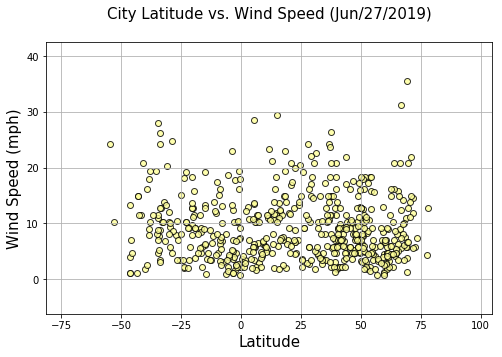

In [15]:
print("Average Wind Speed: {:.2f}".format(city_weather_now_df['Wind Speed (mph)'].mean()))
print("Max Wind Speed: {:.2f}".format(city_weather_now_df['Wind Speed (mph)'].max()))
print("Number of city with wind speed greater than 25 mph: {}\n".format(city_weather_now_df[city_weather_now_df
                                                                                    ['Wind Speed (mph)'] 
                                                                          > 25].count()['City']))

# define x, y axis
col = ["Lat", "Wind Speed (mph)"]

x = city_weather_now_df[col[0]]
y = city_weather_now_df[col[1]]

# plot Latitude vs. Wind Speed
color = (1, 1, 0.6)
alpha = 0.8
plot_setting(x,y,color,alpha)
plt.xlabel("Latitude", fontsize = font)
plt.ylabel(col[1], fontsize = font)
plt.title(f"City Latitude vs. Wind Speed ({date})\n", fontsize = font)
plt.savefig("output_data/wind_speed.png")
plt.show()